## Data Dictionary:

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target

The features can be summarized as the following:

- **`Clothing ID`**: Integer Categorical variable that refers to the specific piece being reviewed.
- **`Age`**: Positive Integer variable of the reviewers age.
- **`Title`**: String variable for the title of the review.
- **`Review Text`**: String variable for the review body.
- **`Positive Feedback Count`**: Positive Integer documenting the number of other customers who found this review positive.
- **`Division Name`**: Categorical name of the product high level division.
- **`Department Name`**: Categorical name of the product department name.
- **`Class Name`**: Categorical name of the product class name.

The target:
- **`Recommended IND`**: Binary variable stating where the customer recommends the product where `1 is recommended`, `0 is not recommended`.

# Load the Data

In [1]:
import pandas as pd

data = pd.read_csv('../data/reviews.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')


# if it gives an error, you should install the model
# !python -m spacy download en_core_web_sm

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


In [4]:
# we don't have missing values, what is helpful for us
data.head()

,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


In [5]:
# Before we start doing any analysis, we need to split the data into train and test sets.

# Split data into train and test sets
from sklearn.model_selection import train_test_split

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Data Exploration

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16597, 8), (1845, 8), (16597,), (1845,))

In [7]:
X_train.head()

,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
893,1060,37,Super cute. pockets would be nice,Easy and fun jumper. runs slightly large. i or...,2,General Petite,Bottoms,Pants
1767,1072,23,Great for all seasons,The dress looks great both in winter and summe...,0,General Petite,Dresses,Dresses
4491,1078,41,Just ok,I wanted to love this dress as it seemed perfe...,10,General,Dresses,Dresses
17626,862,52,Cute but...,I loved this shirt when i purchased it but it ...,6,General Petite,Tops,Knits
11184,1083,28,Grandmas draperies dress,I had to review this because i purchased befor...,3,General,Dresses,Dresses


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 893 to 5139
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              16597 non-null  int64 
 1   Age                      16597 non-null  int64 
 2   Title                    16597 non-null  object
 3   Review Text              16597 non-null  object
 4   Positive Feedback Count  16597 non-null  int64 
 5   Division Name            16597 non-null  object
 6   Department Name          16597 non-null  object
 7   Class Name               16597 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


In [9]:
# Feature mapping 
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_features.remove('Clothing ID') # Clothing ID as a number is not useful for us
num_features
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
cat_features.remove('Review Text') # Review text is not a categorical feature
cat_features
text_features = ['Review Text']

In [10]:
print(f'Numerical features: {num_features}')
print(f'Categorical features: {cat_features}')
print(f'Text features: {text_features}')

Numerical features: ['Age', 'Positive Feedback Count']
Categorical features: ['Title', 'Division Name', 'Department Name', 'Class Name']
Text features: ['Review Text']


In [11]:
X_train.Title.value_counts()

Title
Love it!                                  120
Beautiful                                  78
Love!                                      74
Love                                       69
Beautiful!                                 65
                                         ... 
Such a unique piece!                        1
Great w/ black crops                        1
Vegan pilcro                                1
Favorite retailer purchase!                 1
Wonderfully soft and cute pop of color      1
Name: count, Length: 11955, dtype: int64

In [12]:
X_train['Division Name'].value_counts()

Division Name
General           10497
General Petite     6100
Name: count, dtype: int64

In [13]:
X_train['Department Name'].value_counts()

Department Name
Tops        7818
Dresses     4845
Bottoms     2852
Jackets      813
Intimate     172
Trend         97
Name: count, dtype: int64

In [14]:
X_train['Class Name'].value_counts()

Class Name
Dresses           4845
Knits             3554
Blouses           2337
Sweaters          1095
Pants             1041
Jeans              885
Fine gauge         832
Skirts             693
Jackets            549
Outerwear          264
Shorts             232
Lounge             172
Trend               97
Casual bottoms       1
Name: count, dtype: int64

In [15]:
cat_features.remove('Title')

In [16]:
from helpers import bivariante_analysis_cat, bivariante_analysis_num

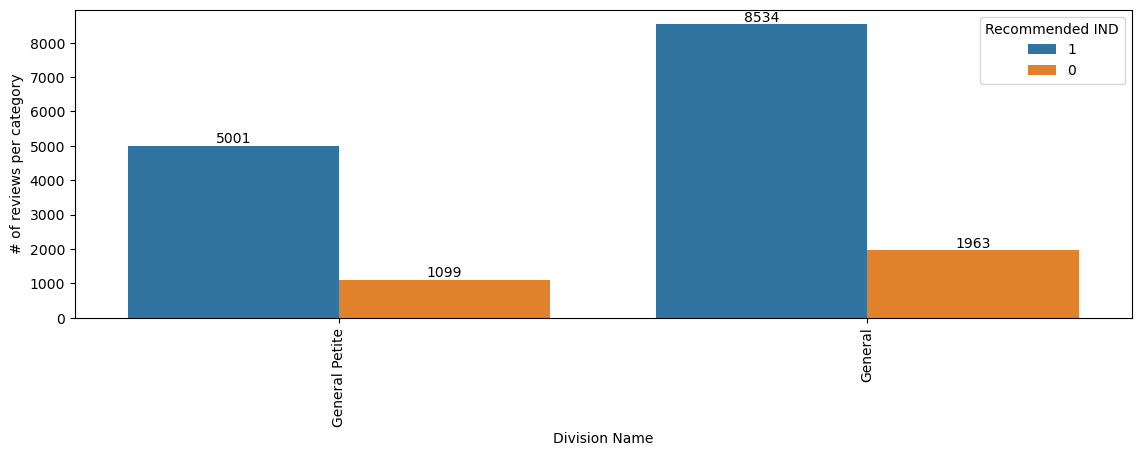

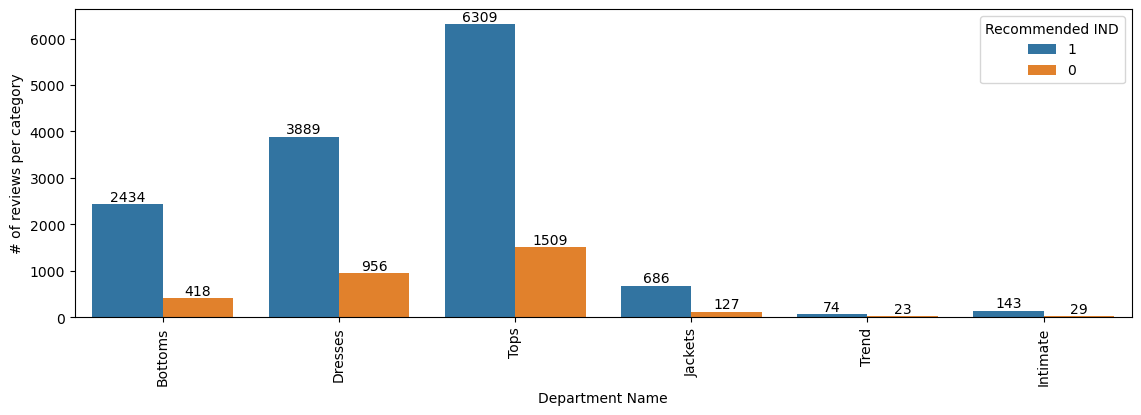

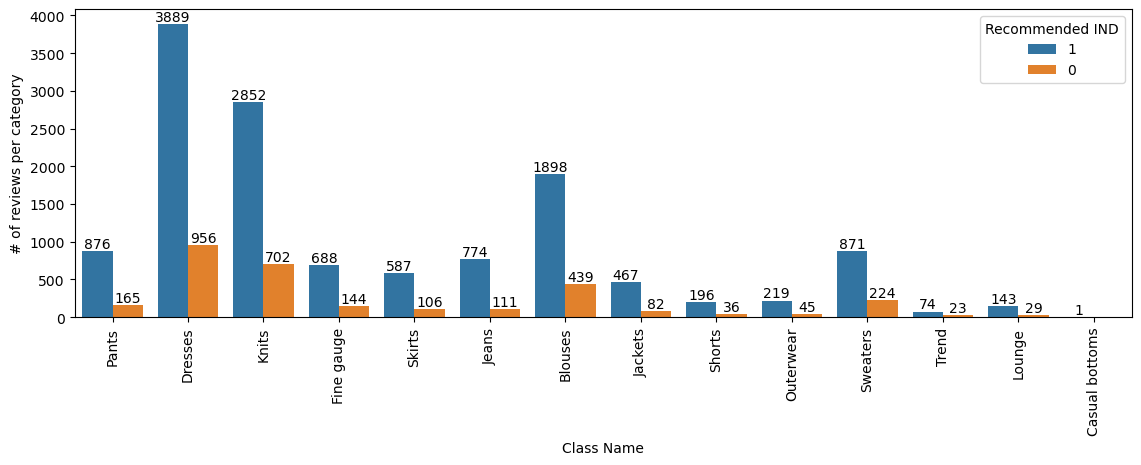

In [17]:
bivariante_analysis_cat(pd.concat([X_train, y_train], axis=1), cat_features, 'Recommended IND', '# of reviews per category')

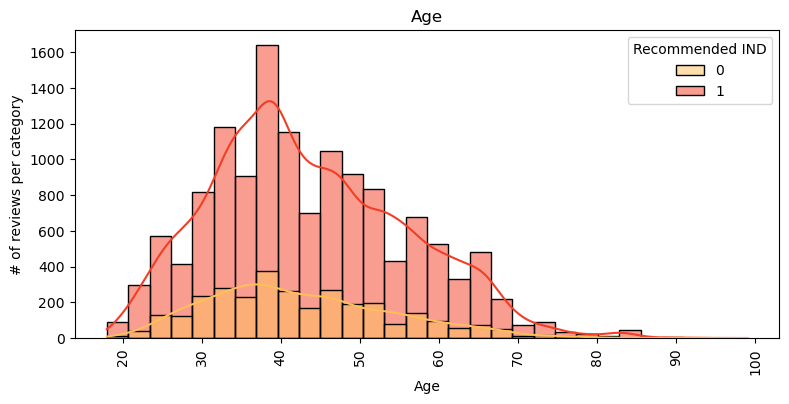

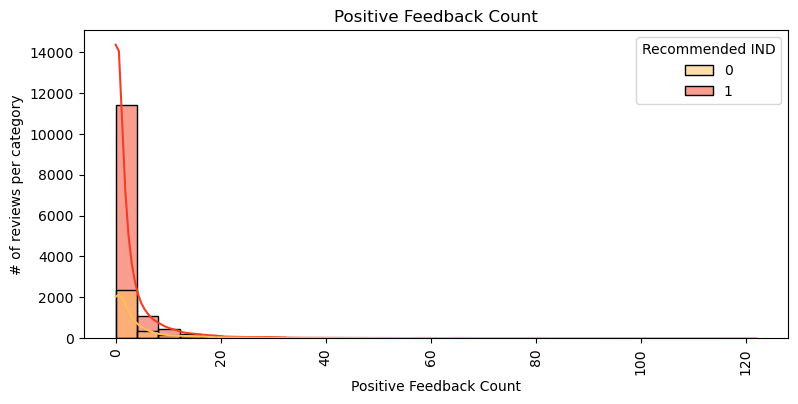

In [18]:
bivariante_analysis_num(pd.concat([X_train, y_train], axis=1), num_features, 'Recommended IND', '# of reviews per category')

# Building Pipelines

### Numerical Features Pipeline

In [19]:
# Our dataset is clean, but we can still do some feature engineering to improve our model.
# We are going to apply scallers for the numerical features and one-hot encoding for the categorical features.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([('minmax_scaler', MinMaxScaler())])
num_pipeline

Pipeline(steps=[('minmax_scaler', MinMaxScaler())])

### Categorical Features Pipelines

In [20]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_pipeline = Pipeline([('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                         ('onehot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('onehot_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Text Features Pipelines

In [ ]:
# Create a customer transformer for text features

from sklearn.base import BaseEstimator, TransformerMixin

class CountCharacter(BaseEstimator, TransformerMixin):

    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[text.count(self.character) for text in X]]


# Training Pipeline

# Fine-Tuning Pipeline